In [30]:
import random

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [27]:
# 超参数
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [21]:
# 生成 k 个浮点数
def GetDeff(s, t, k):
    deff = []
    for i in range(k):
        deff.append(random.uniform(s, t))
    return deff

In [26]:
x_train = GetDeff(0, 20, 20)
y_train = GetDeff(0, 10, 20)
x_train = np.array(x_train)
y_train = np.array(y_train)
n_samples = x_train.shape[0]

In [20]:
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
w = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())

In [24]:
pre = tf.add(tf.multiply(x, w), b)

In [28]:
cost = tf.reduce_sum(tf.pow(pre - y, 2) / (2 * n_samples))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [29]:
init = tf.global_variables_initializer()

epoch: 0   cost=9.629988   w=0.041249   b=0.541869
epoch: 50   cost=4.634287   w=0.221790   b=0.932157
epoch: 100   cost=4.394084   w=0.200092   b=1.272750
epoch: 150   cost=4.196599   w=0.180441   b=1.581215
epoch: 200   cost=4.034198   w=0.162643   b=1.860582
epoch: 250   cost=3.900611   w=0.146525   b=2.113597
epoch: 300   cost=3.790695   w=0.131926   b=2.342746
epoch: 350   cost=3.700228   w=0.118705   b=2.550279
epoch: 400   cost=3.625743   w=0.106731   b=2.738236
epoch: 450   cost=3.564393   w=0.095887   b=2.908464
epoch: 500   cost=3.513841   w=0.086065   b=3.062634
epoch: 550   cost=3.472167   w=0.077170   b=3.202262
epoch: 600   cost=3.437796   w=0.069114   b=3.328718
epoch: 650   cost=3.409434   w=0.061818   b=3.443242
epoch: 700   cost=3.386013   w=0.055210   b=3.546970
epoch: 750   cost=3.366662   w=0.049225   b=3.640914
epoch: 800   cost=3.350664   w=0.043805   b=3.725991
epoch: 850   cost=3.337426   w=0.038896   b=3.803043
epoch: 900   cost=3.326463   w=0.034451   b=3.872

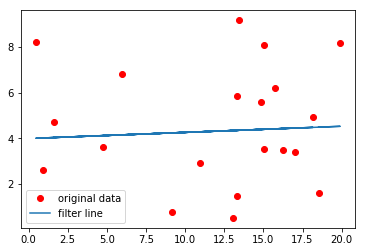

In [35]:
with tf.Session() as sess:
    sess.run(init)
    for epo in range(training_epochs):
        for (xt, yt) in zip(x_train, y_train):
            sess.run(optimizer, feed_dict={x:xt, y:yt})
        if epo % display_step == 0:
            c = sess.run(cost, feed_dict={x:x_train, y:y_train})
            print("epoch: %d   cost=%f   w=%f   b=%f" % (epo, c, sess.run(w), sess.run(b)))
    print("完成")
    train_cost = sess.run(cost, feed_dict={x:x_train, y:y_train})
    print("training cost= %f  w=%f  b=%f" % (train_cost, sess.run(w), sess.run(b)))
    plt.plot(x_train, y_train, "ro", label="original data")
    plt.plot(x_train, sess.run(w) * x_train + sess.run(b), label="filter line")
    plt.legend()
    plt.show()